# 4.1	Analyse des Goldstandard-Korpus
## Text Vorbereitung für die Analyse mit N-Grams und Voyant Tools


### Herangehensweise:

Die Inhalte der Stellenanzeigen soll in anderen Notebooks näher untersucht werden. Dazu wird der Text weiter normalisiert und von Stopwörtern befreit.

## 1. Bibliotheken

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import nltk
from nltk.tokenize import word_tokenize

## 2. Funktionen

In [2]:
def erase_punctuation(df, column_inputText, newColumnName):
    """
    Needs a datframe with a text (string) column
    1. creates a new column
    2. erases all puntuation in this new column
    3. return df
    """
    df[newColumnName] = df[column_inputText].str.replace('[^\w\s]','')
    return df

def tokenize(df, column_inputText, newColumnName):
    """
    Needs the following import:
    import nltk
    from nltk.tokenize import word_tokenize
    
    Needs a datframe with a text (string) column
    1. creates a new column
    2. tokenizes the text in the new column
    3. return df
    """
    df[newColumnName] = df[column_inputText].apply(word_tokenize)
    return df

def detokenize(df, column_inputText, newColumnName):
    """
    Needs a dataframe with a tokenized text column (column_inputText)
    1. creates a new column
    2. joins Text in List format to string
    3. return df
    """
    df[newColumnName] = [' '.join(map(str, l)) for l in df[column_inputText]]
    return df

def no_stopwords(df, column_inputText, newColumnName):
    """
    Needs the following import:
    import pandas as pd
    import nltk
    from nltk.tokenize import word_tokenize
    
    Needs a dataframe with tokenized text (list) column and list with stopwords named "stopwords"
    1. creates a new column
    2. reases all the stopwords from the new text column
    3. return df
    """
    stop_words = set(stopwords)
    df[newColumnName] = df[column_inputText].apply(lambda x: [item for item in x if item not in stop_words])
    return df

def plot_top_stopwords_barchart(text):
    """
    Needs the following import:
    import matplotlib.pyplot as plt
    
    Needs a datframe with text column
    1. finds all the stopwords in the text
    2. plots the stopwords to be deleted in a bar chart
    """
    stop = set(stopwords)
    
    new = text.str.split()
    new = new.values.tolist()
    corpus = [word for i in new for word in i]
    from collections import defaultdict
    dic = defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top = sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10]
    x,y = zip(*top)
    plt.figure(figsize=(10,10))
    plt.bar(x,y)
    

## 3. Datenimport
#### Import des Dataframe df_master file von 3.3.

In [3]:
df = pd.read_csv("../output/3.3_ocr_ground_truth_vergleich/difference_output_normalized_corpus.csv")
df = df[["identifier", "region_class", "pub_id", "pub_name", "date", "ground_truth_normalized", "OCR_normalized"]]

#### Import Stopword Liste

In [4]:
with open('../input/stopwords.txt') as f:
        stopwords = f.read().splitlines()

## 4. Anwendung der Funktionen zur Erstellung des Master Dataframe

Für die einheitliche Bennennung der neuen Spalten des Dataframes muss der Beginn der neuen Spaltennamen definiert werden.
Da es sich hier um die Verarbeitung des Goldstandard Korpus handelt, wurde dafür 'ground_truth' gewählt.

In [5]:
columnname = "ground_truth"

### 4.1. Datenreinigung

- columnname_nP
- columnname_Tokens
- columnname_nSW_Tokens

In [6]:
df = erase_punctuation(df, "ground_truth_normalized", columnname+"_nP")
df = tokenize(df, columnname+"_nP", columnname+"_Tokens")
df = no_stopwords(df, columnname+"_Tokens", columnname+"_nSW_Tokens")
df = detokenize(df, columnname+"_nSW_Tokens", columnname+"_nSW")

/var/folders/d1/x4qm1hmx4sj6q61rdmcwx57m0000gn/T/ipykernel_5138/3317487459.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  df[newColumnName] = df[column_inputText].str.replace('[^\w\s]','')


In [7]:
df.head()

,identifier,region_class,pub_id,pub_name,date,ground_truth_normalized,OCR_normalized,ground_truth_nP,ground_truth_Tokens,ground_truth_nSW_Tokens,ground_truth_nSW
0,aze_19130917_12_SEARCH_0,SEARCH,aze,Arbeiter-Zeitung,1913,kutscher polizeilich geprüft bittet um posten ...,kutscher um bachgasse,kutscher polizeilich geprüft bittet um posten ...,"[kutscher, polizeilich, geprüft, bittet, um, p...","[kutscher, polizeilich, geprüft, bittet, poste...",kutscher polizeilich geprüft bittet posten xvi...
1,aze_19130917_12_OFFER_1,OFFER,aze,Arbeiter-Zeitung,1913,einige jüngere lustergürter finden dauernde be...,einige jüngere uustgirter finden danernde besc...,einige jüngere lustergürter finden dauernde be...,"[einige, jüngere, lustergürter, finden, dauern...","[jüngere, lustergürter, finden, dauernde, besc...",jüngere lustergürter finden dauernde beschäfti...
2,aze_19130917_12_OFFER_2,OFFER,aze,Arbeiter-Zeitung,1913,lehrmädchen zum kleidermachen wird aufgenommen...,lehrmädchen äum kleidermachen wird aufgenommen...,lehrmädchen zum kleidermachen wird aufgenommen...,"[lehrmädchen, zum, kleidermachen, wird, aufgen...","[lehrmädchen, kleidermachen, aufgenommen, lehr...",lehrmädchen kleidermachen aufgenommen lehrzeit...
3,aze_19130917_12_OFFER_3,OFFER,aze,Arbeiter-Zeitung,1913,schneiderinnen 1111 ausfertigerinnen und kettl...,schneid erinnen ausferti an und kettlerinnen w...,schneiderinnen 1111 ausfertigerinnen und kettl...,"[schneiderinnen, 1111, ausfertigerinnen, und, ...","[schneiderinnen, 1111, ausfertigerinnen, kettl...",schneiderinnen 1111 ausfertigerinnen kettlerin...
4,aze_19130917_12_OFFER_4,OFFER,aze,Arbeiter-Zeitung,1913,als wäscherin oder bedienerin sucht eine frau ...,als wäscherin oder bedienerin sucht eine frau ...,als wäscherin oder bedienerin sucht eine frau ...,"[als, wäscherin, oder, bedienerin, sucht, eine...","[wäscherin, bedienerin, sucht, frau, posten, z...",wäscherin bedienerin sucht frau posten zuschri...


### 4.2. Wortzählungen für die Stopwort Liste

In [8]:
xss = df['ground_truth_Tokens'].tolist()
tokenOverview = [x for xs in xss for x in xs]
df_tokenOverview = pd.DataFrame(tokenOverview, columns =['Wörter'])

df_tokenOverview['Frequenz'] = df_tokenOverview.groupby('Wörter')['Wörter'].transform('count')
df_tokenOverview = df_tokenOverview.drop_duplicates()
df_tokenOverview = df_tokenOverview.sort_values(by=['Frequenz'], ascending=False)

In [9]:
df_tokenOverview.head(15)

,Wörter,Frequenz
32,aufgenommen,655
43,und,594
45,werden,457
97,für,412
31,wird,335
23,in,229
279,sofort,208
460,der,194
20,an,186
8,tür,185


## 5. Visualisierung aller Stopwords, die extrahiert wurden

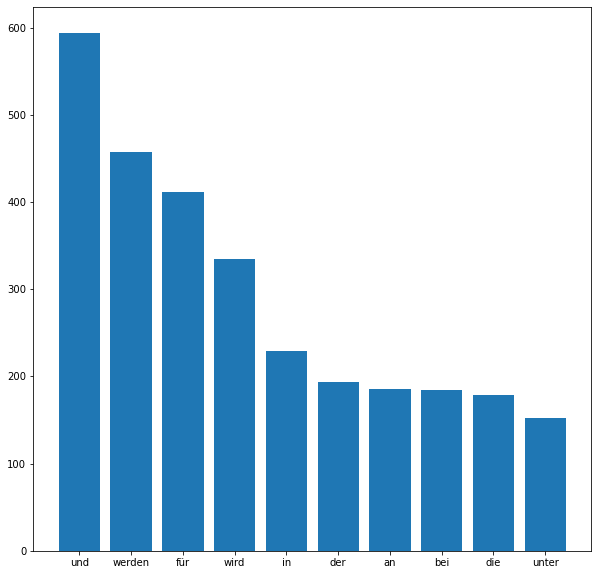

In [10]:
plot_top_stopwords_barchart(df[columnname+"_nP"])

## 6. Berechnung der Anzahl der Wörter 

In [11]:
# Count Tokens and save in new column
df['Num_Token_ground_truth'] = df["ground_truth_Tokens"].str.len()
df.head()

,identifier,region_class,pub_id,pub_name,date,ground_truth_normalized,OCR_normalized,ground_truth_nP,ground_truth_Tokens,ground_truth_nSW_Tokens,ground_truth_nSW,Num_Token_ground_truth
0,aze_19130917_12_SEARCH_0,SEARCH,aze,Arbeiter-Zeitung,1913,kutscher polizeilich geprüft bittet um posten ...,kutscher um bachgasse,kutscher polizeilich geprüft bittet um posten ...,"[kutscher, polizeilich, geprüft, bittet, um, p...","[kutscher, polizeilich, geprüft, bittet, poste...",kutscher polizeilich geprüft bittet posten xvi...,10
1,aze_19130917_12_OFFER_1,OFFER,aze,Arbeiter-Zeitung,1913,einige jüngere lustergürter finden dauernde be...,einige jüngere uustgirter finden danernde besc...,einige jüngere lustergürter finden dauernde be...,"[einige, jüngere, lustergürter, finden, dauern...","[jüngere, lustergürter, finden, dauernde, besc...",jüngere lustergürter finden dauernde beschäfti...,18
2,aze_19130917_12_OFFER_2,OFFER,aze,Arbeiter-Zeitung,1913,lehrmädchen zum kleidermachen wird aufgenommen...,lehrmädchen äum kleidermachen wird aufgenommen...,lehrmädchen zum kleidermachen wird aufgenommen...,"[lehrmädchen, zum, kleidermachen, wird, aufgen...","[lehrmädchen, kleidermachen, aufgenommen, lehr...",lehrmädchen kleidermachen aufgenommen lehrzeit...,12
3,aze_19130917_12_OFFER_3,OFFER,aze,Arbeiter-Zeitung,1913,schneiderinnen 1111 ausfertigerinnen und kettl...,schneid erinnen ausferti an und kettlerinnen w...,schneiderinnen 1111 ausfertigerinnen und kettl...,"[schneiderinnen, 1111, ausfertigerinnen, und, ...","[schneiderinnen, 1111, ausfertigerinnen, kettl...",schneiderinnen 1111 ausfertigerinnen kettlerin...,14
4,aze_19130917_12_OFFER_4,OFFER,aze,Arbeiter-Zeitung,1913,als wäscherin oder bedienerin sucht eine frau ...,als wäscherin oder bedienerin sucht eine frau ...,als wäscherin oder bedienerin sucht eine frau ...,"[als, wäscherin, oder, bedienerin, sucht, eine...","[wäscherin, bedienerin, sucht, frau, posten, z...",wäscherin bedienerin sucht frau posten zuschri...,16


## 7. Export

In [13]:
# export all job ads without stopwords as txt file
with open('../output/4.1_text_preparation_ground_truth/ground_truth_nSW.txt', 'w', encoding = 'utf-8') as f:
    for rec_index, rec in df.iterrows():
        f.write(rec['ground_truth_nSW'] + '\n')


In [14]:
#export the prepared korpus
df.to_csv(r"../output/4.1_text_preparation_ground_truth/text_prep_ground_truth.csv")